In [105]:
#!pip install descartes

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import fiona
import pandas as pd
import shapely
from shapely.geometry import shape,mapping, Point, Polygon, MultiPolygon
import geopandas as gpd
import descartes

### zone index from 1 to 263

In [3]:
df = pd.read_csv('../data/trip_cleaned.csv')

In [16]:
a = sorted(df.pickup_taxizone_id.unique())
b = sorted(df.dropoff_taxizone_id.unique())
# 1~263

### find adjacent zones 
(zone id from 0 to 262, converted to 1~263)

In [88]:
poly_list = [] # len = 263
shp_file = '../data/NYC Taxi Zones/taxi_zones.shp'
taxi_zones = fiona.open(shp_file)

adjacent = []
for i in range(len(taxi_zones)):
    zone1 = taxi_zones[i]
    shape1 = shapely.geometry.asShape(zone1['geometry'])
    for j in range(i+1, len(taxi_zones)):
        zone2 = taxi_zones[j]
        shape2 = shapely.geometry.asShape(zone2['geometry'])
        if (shape1.intersects(shape2)):
            adjacent.append([i+1,j+1])

### plot zones

In [101]:
sf = gpd.read_file('../data/NYC Taxi Zones/taxi_zones.shp')

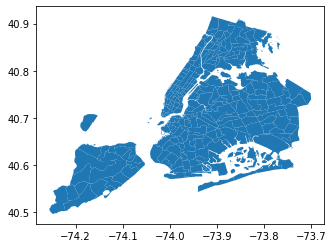

In [107]:
sf.plot()

In [111]:
adjacent[:10]

[[2, 33],
 [2, 137],
 [3, 32],
 [3, 51],
 [3, 83],
 [3, 184],
 [3, 185],
 [3, 243],
 [3, 257],
 [4, 74]]

### save to csv

In [108]:
df = pd.DataFrame(data=adjacent, columns=["zone1", "zone2"])

In [110]:
df.to_csv('../data/adjacent_zone.csv', index=False)

## Test function

In [120]:

def is_adjacent(src, dst):
    """is two taxi zones adjacent.
    Parameters
    ----------
    src : int
        taxi zone 1
    dst : int
        taxi zone 2
    Returns
    -------
    bool
    """
    #raise NotImplementedError()
    
    ad = pd.read_csv('../data/adjacent_zone.csv')
    if dst<src:
        a = dst
        b = src
        r = ad.loc[(ad.zone1 == a)&(ad.zone2 == b)]
    else:
        r = ad.loc[(ad.zone1 == src)&(ad.zone2 == dst)]
    
    return (len(r)>0)

In [123]:
is_adjacent(33,2)

True